In [99]:
#risk analytics in banking and ﬁnancial services
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [100]:
loan = pd.read_csv("loan.csv", sep=",")
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [101]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [102]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [103]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [104]:
loan = loan.drop(loan.columns[(loan.isnull().sum()/len(loan.index))>0.8], axis=1)

In [105]:
loan.shape

(39717, 55)

In [106]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [107]:
loan.loc[:, ['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


In [108]:
loan = loan.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [10]:
loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [11]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [12]:
loan['int_rate']

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [13]:
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [14]:
loan['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [15]:
loan = loan[~loan['emp_length'].isnull()]
import re
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

In [16]:
loan['emp_length']

0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 38642, dtype: object

In [17]:
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))

In [18]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

In [19]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [20]:
#dropping columns which are not present at the time of loan,i.e. customer behaviour
behaviour_var =  ["delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util",
      "total_acc","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee",
      "recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","application_type"]
data = loan.drop(behaviour_var, axis=1)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

In [22]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,AZ,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,GA,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,IL,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,CA,20.00,f,0.0,1,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,OR,17.94,f,0.0,1,0,0.0,0,0.0,0.0


In [23]:
data = data.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

In [24]:
data.shape

(38642, 28)

In [25]:
data['loan_status'] = data['loan_status'].astype('category')
data['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [26]:
data = data[data['loan_status'] != 'Current']

In [27]:
data['loan_status'] = data['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
data['loan_status'] = data['loan_status'].apply(lambda x: pd.to_numeric(x))

In [28]:
data['loan_status'].unique()

array([0, 1], dtype=int64)

In [29]:
#'loan_status'=1 denotes defaulters
np.mean(data['loan_status'])

0.14380460259961644

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 28 columns):
id                            37544 non-null int64
member_id                     37544 non-null int64
loan_amnt                     37544 non-null int64
funded_amnt                   37544 non-null int64
funded_amnt_inv               37544 non-null float64
term                          37544 non-null object
int_rate                      37544 non-null float64
installment                   37544 non-null float64
grade                         37544 non-null object
sub_grade                     37544 non-null object
emp_title                     36136 non-null object
emp_length                    37544 non-null int64
home_ownership                37544 non-null object
annual_inc                    37544 non-null float64
verification_status           37544 non-null object
issue_d                       37544 non-null object
loan_status                   37544 non-null int64
pymnt_pla

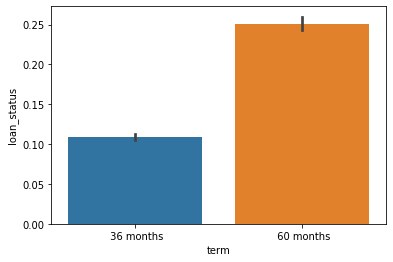

In [31]:
#categorical columns' analysis
sns.barplot(x='term', y='loan_status', data=data)
plt.show()

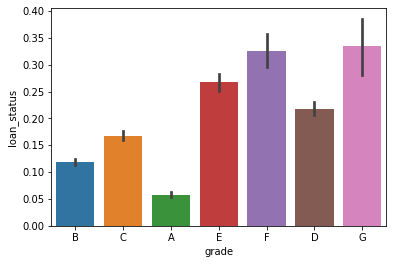

In [32]:
sns.barplot(x='grade', y='loan_status', data=data)
plt.show()

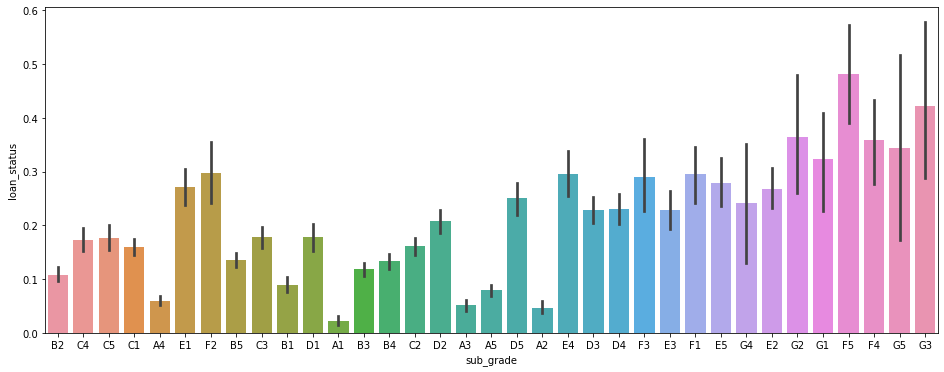

In [33]:
plt.figure(figsize=(16, 6))
sns.barplot(x='sub_grade', y='loan_status', data=data)
plt.show()

In [34]:
len(data['emp_title'].unique())

27983

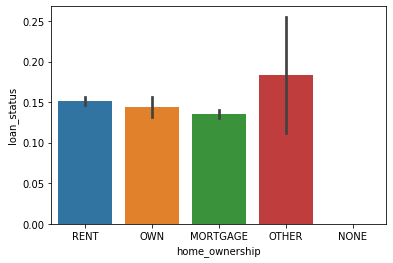

In [35]:
sns.barplot(x='home_ownership', y='loan_status', data=data)
plt.show()

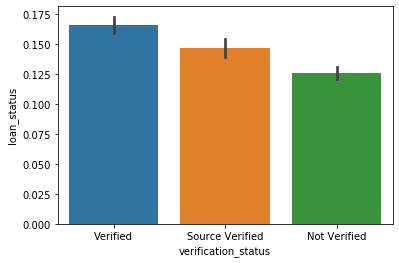

In [36]:
sns.barplot(x='verification_status', y='loan_status', data=data)
plt.show()

In [37]:
data['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 37544, dtype: object

In [38]:
#converting year column into datetime and extracting year and month from it
from datetime import datetime
data['issue_d'] = data['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
data['month'] = data['issue_d'].apply(lambda x: x.month)
data['year'] = data['issue_d'].apply(lambda x: x.year)

In [39]:
data.groupby('year')['year'].count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

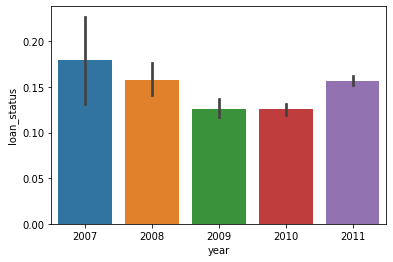

In [40]:
sns.barplot(x='year', y='loan_status', data=data)
plt.show()

In [41]:
data.groupby('month')['month'].count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

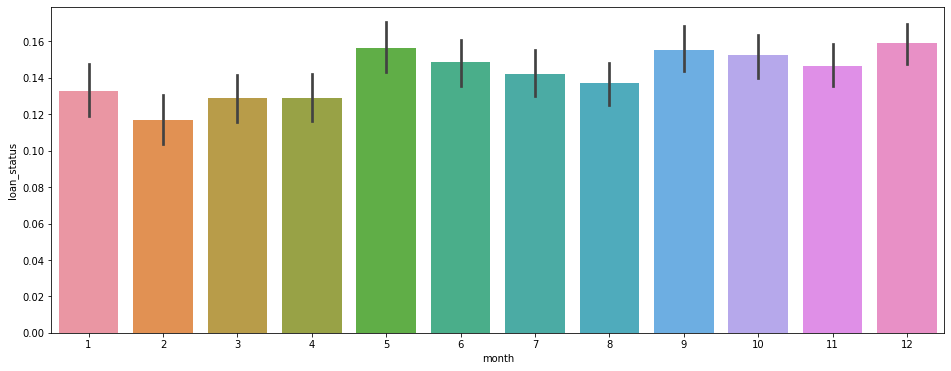

In [42]:
plt.figure(figsize=(16, 6))
sns.barplot(x='month', y='loan_status', data=data)
plt.show()

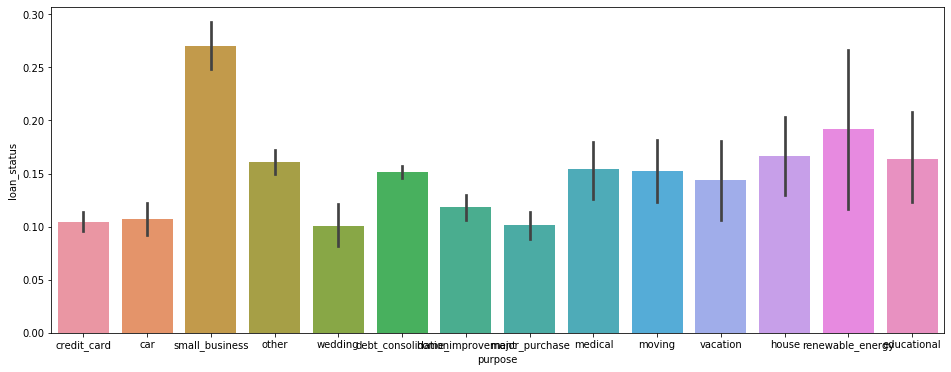

In [43]:
plt.figure(figsize=(16, 6))
sns.barplot(x='purpose', y='loan_status', data=data)
plt.show()

In [44]:
data['pymnt_plan'].unique()

array(['n'], dtype=object)

In [45]:
data['initial_list_status'].unique()

array(['f'], dtype=object)

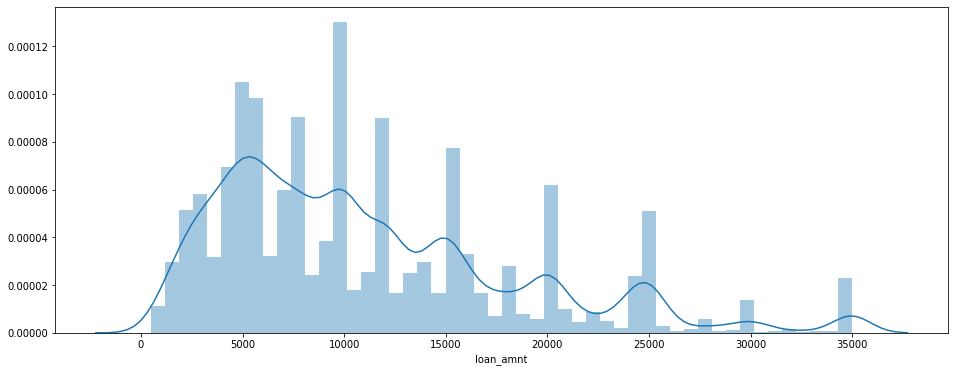

In [46]:
#analysing numerical columns
plt.figure(figsize=(16, 6))
sns.distplot(data['loan_amnt'])
plt.show()

In [47]:
# binning continous variables
def amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'

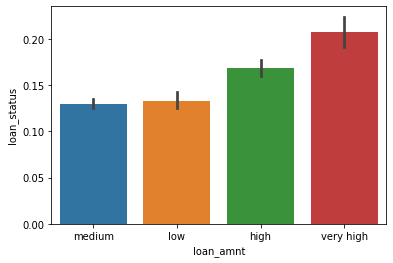

In [48]:
data['loan_amnt'] = data['loan_amnt'].apply(lambda x: amount(x))
sns.barplot(x='loan_amnt', y='loan_status', data=data)
plt.show()

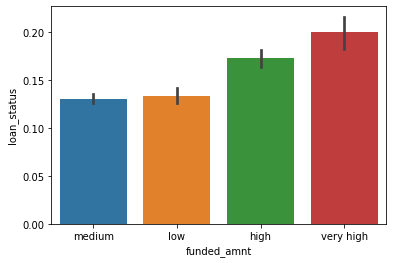

In [49]:
data['funded_amnt'] = data['funded_amnt'].apply(lambda x: amount(x))
sns.barplot(x='funded_amnt', y='loan_status', data=data)
plt.show()

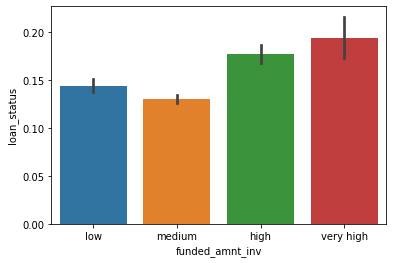

In [50]:
data['funded_amnt_inv'] = data['funded_amnt_inv'].apply(lambda x: amount(x))
sns.barplot(x='funded_amnt_inv', y='loan_status', data=data)
plt.show()

In [51]:
def rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
data['int_rate'] = data['int_rate'].apply(lambda x: rate(x))

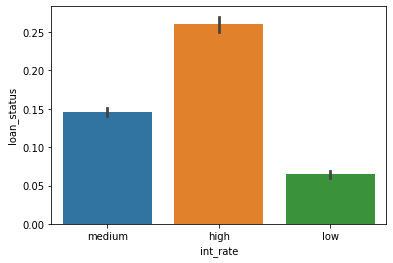

In [52]:
sns.barplot(x='int_rate', y='loan_status', data=data)
plt.show()

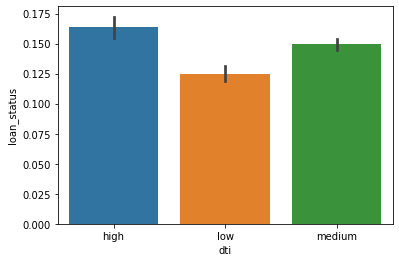

In [53]:
#debt-to-income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'   
data['dti'] = data['dti'].apply(lambda x: dti(x))
sns.barplot(x='dti', y='loan_status', data=data)
plt.show()

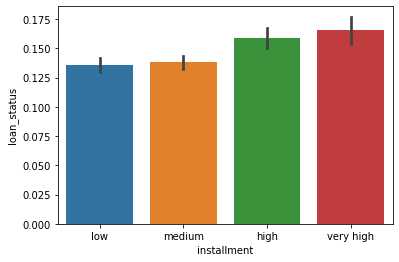

In [54]:
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'    
data['installment'] = data['installment'].apply(lambda x: installment(x))
sns.barplot(x='installment', y='loan_status', data=data)
plt.show()

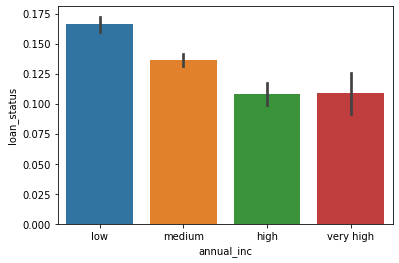

In [55]:
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'
data['annual_inc'] = data['annual_inc'].apply(lambda x: annual_income(x))
sns.barplot(x='annual_inc', y='loan_status', data=data)
plt.show()

In [56]:
data = data[~data['emp_length'].isnull()]

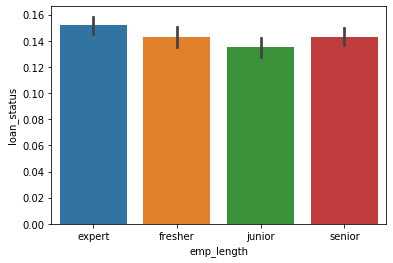

In [57]:
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

data['emp_length'] = data['emp_length'].apply(lambda x: emp_length(x))
sns.barplot(x='emp_length', y='loan_status', data=data)
plt.show()

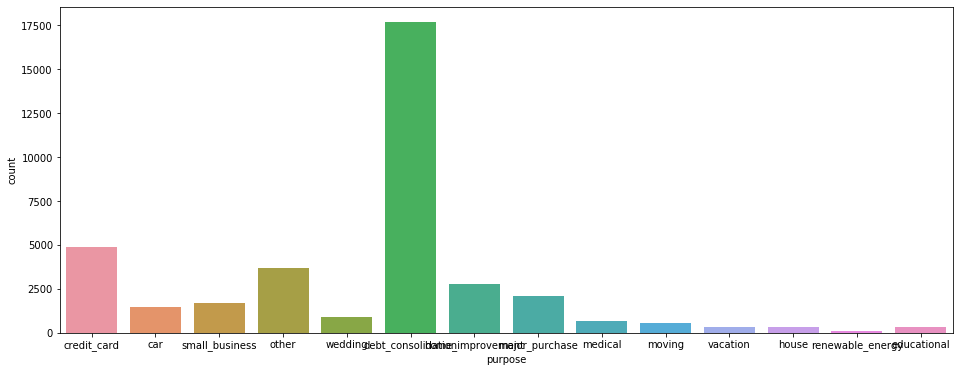

In [65]:
plt.figure(figsize=(16, 6))
sns.countplot(x='purpose', data=data)
plt.show()

In [67]:
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
data = data[data['purpose'].isin(main_purposes)]
data['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

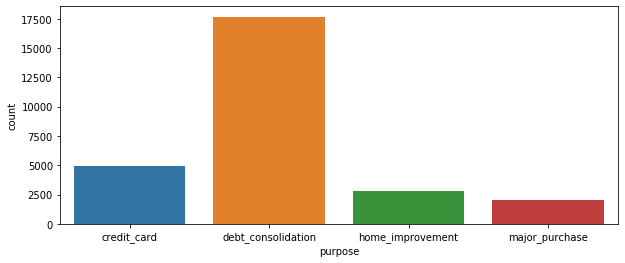

In [74]:
plt.figure(figsize=(10, 4))
sns.countplot(x='purpose', data=data)
plt.show()

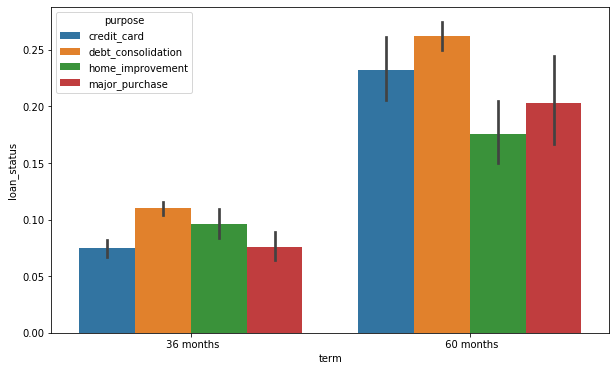

In [76]:
plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=data)
plt.show()

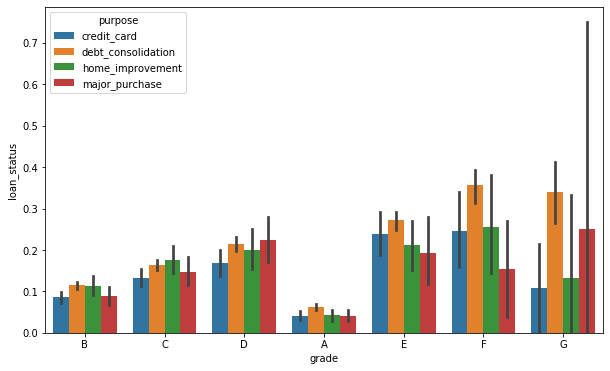

In [77]:
plt.figure(figsize=[10, 6])
sns.barplot(x='grade', y="loan_status", hue='purpose', data=data)
plt.show()

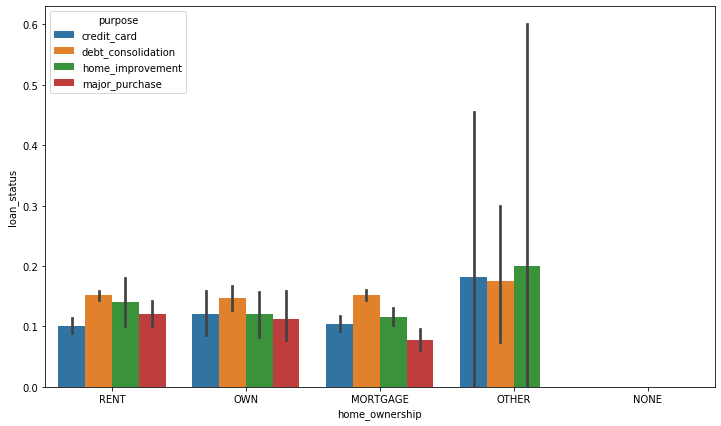

In [81]:
plt.figure(figsize=[12, 7])
sns.barplot(x='home_ownership', y="loan_status", hue='purpose', data=data)
plt.show()

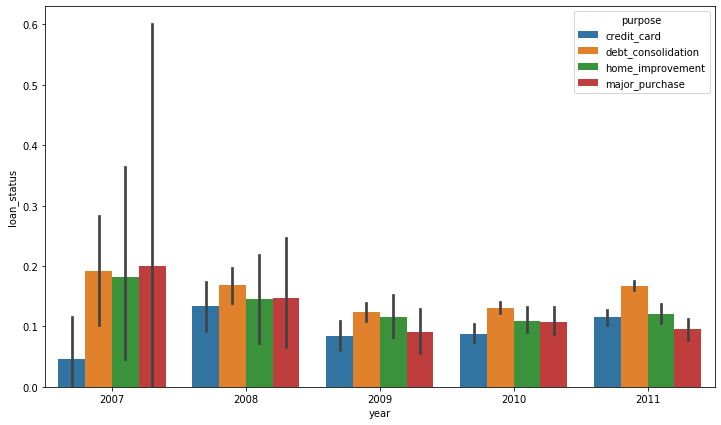

In [82]:
plt.figure(figsize=[12, 7])
sns.barplot(x='year', y="loan_status", hue='purpose', data=data)
plt.show()

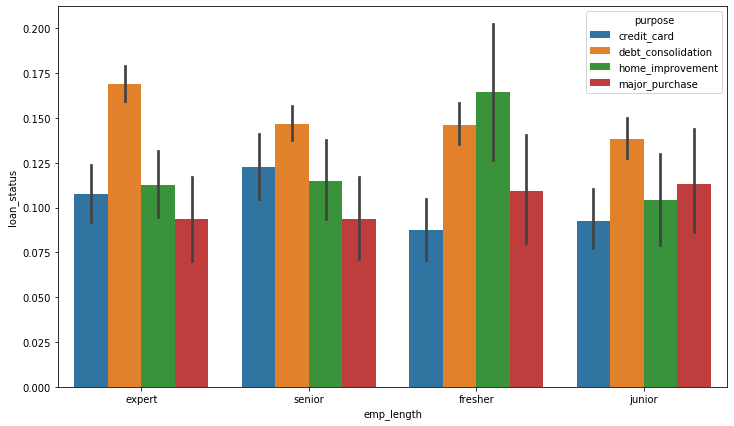

In [83]:
plt.figure(figsize=[12, 7])
sns.barplot(x='emp_length', y="loan_status", hue='purpose', data=data)
plt.show()

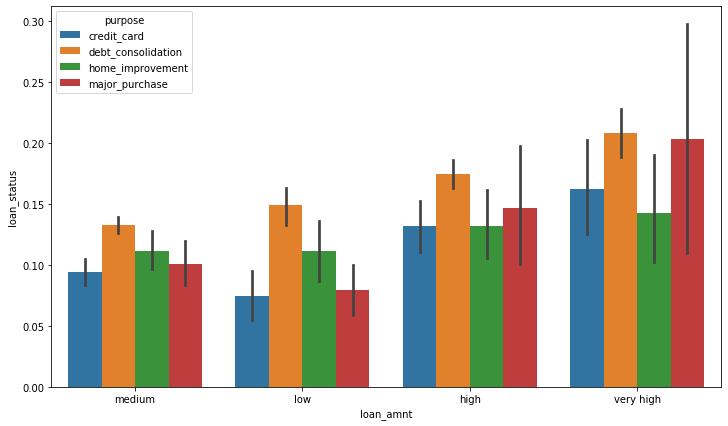

In [84]:
plt.figure(figsize=[12, 7])
sns.barplot(x='loan_amnt', y="loan_status", hue='purpose', data=data)
plt.show()

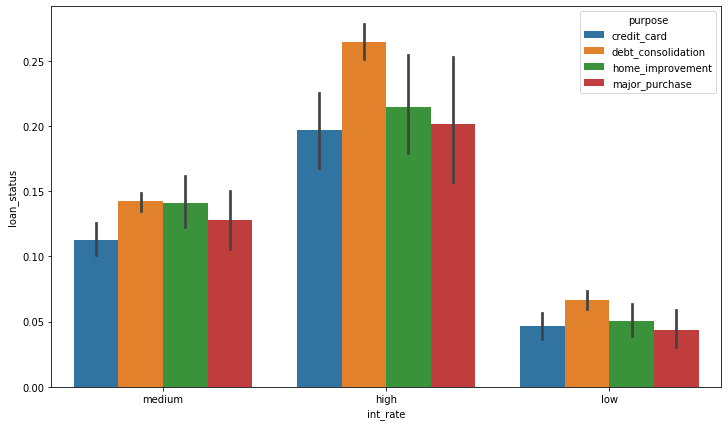

In [85]:
plt.figure(figsize=[12, 7])
sns.barplot(x='int_rate', y="loan_status", hue='purpose', data=data)
plt.show()

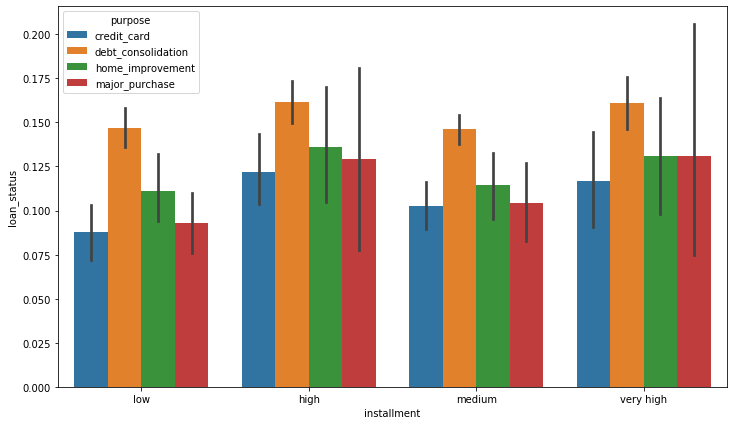

In [86]:
plt.figure(figsize=[12, 7])
sns.barplot(x='installment', y="loan_status", hue='purpose', data=data)
plt.show()

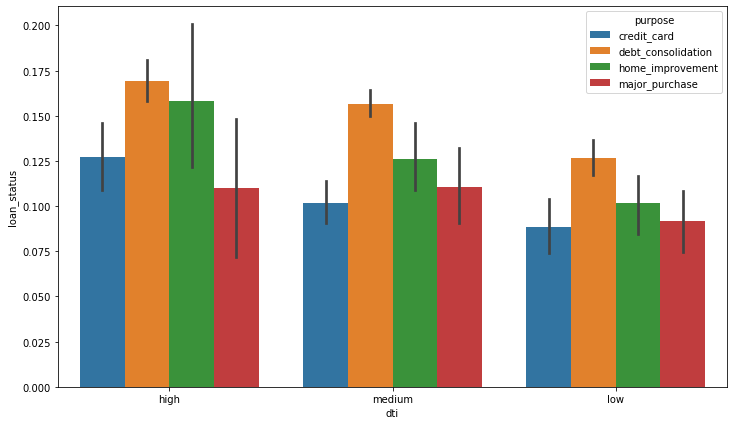

In [87]:
plt.figure(figsize=[12, 7])
sns.barplot(x='dti', y="loan_status", hue='purpose', data=data)
plt.show()

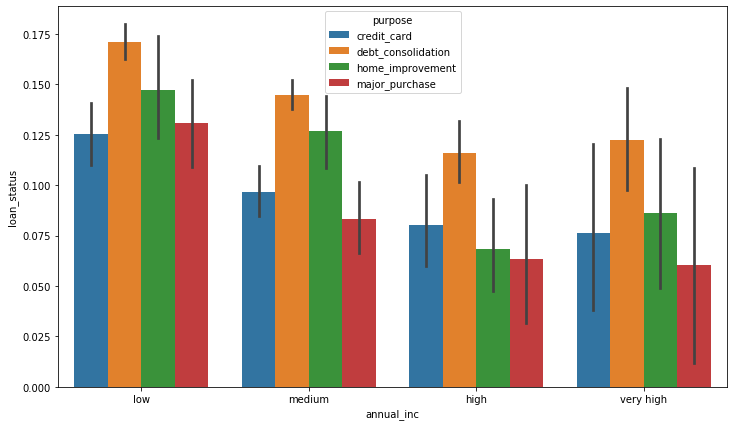

In [88]:
plt.figure(figsize=[12, 7])
sns.barplot(x='annual_inc', y="loan_status", hue='purpose', data=data)
plt.show()

In [90]:
def diff_rate(categorical):
    default_rates = data.groupby(categorical)['loan_status'].mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

In [94]:
categoricals = data.loc[:, data.dtypes == object]
categoricals['loan_status'] = data['loan_status']

In [96]:
categoricals.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan',
       'purpose', 'dti', 'initial_list_status', 'loan_status'],
      dtype='object')

In [97]:
sol_dict = {key: diff_rate(key)[1]*100 for key in categoricals.columns if key != 'loan_status'}
print(sol_dict)

{'loan_amnt': 7.000000000000001, 'funded_amnt': 7.000000000000001, 'funded_amnt_inv': 6.0, 'term': 15.0, 'int_rate': 19.0, 'installment': 3.0, 'grade': 27.0, 'sub_grade': 46.0, 'emp_title': 100.0, 'emp_length': 2.0, 'home_ownership': 16.0, 'annual_inc': 6.0, 'verification_status': 4.0, 'pymnt_plan': 0.0, 'purpose': 5.0, 'dti': 5.0, 'initial_list_status': 0.0}


In [ ]:
#These are the maximum percentage difference between default rate values for differnt unique values 
#of a particular categorical column. maximum differnce->maximum effect on default rate